##### Dataset is downloaded from Kaggle. Link: https://www.kaggle.com/giripujar/hr-analytics

In [692]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [693]:
df = pd.read_csv('HR_comma_sep.csv')

##### impact of salary on employee retention

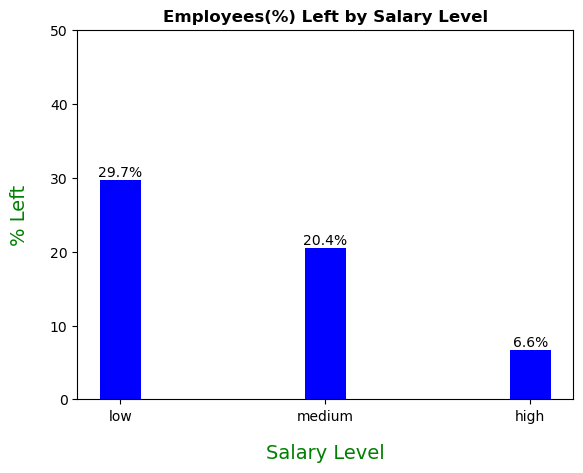

In [694]:
group_avg_left = df.groupby('salary')['left'].mean() * 100

order = ['low', 'medium', 'high']
group_avg_left = group_avg_left.reindex(order)

bars = plt.bar(group_avg_left.index, group_avg_left.values, color='b', width=0.2)
plt.title("Employees(%) Left by Salary Level", fontweight='bold')
plt.xlabel("Salary Level",fontsize=14, color='g',labelpad=15)
plt.ylabel("% Left",fontsize=14, color='g', labelpad=15)
plt.ylim(0,50)
for bar in bars:
  height = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, height + 0.5,f"{height:.1f}%" , ha='center', fontsize=10)

plt.show()

##### Corelation between department and emplyee retention

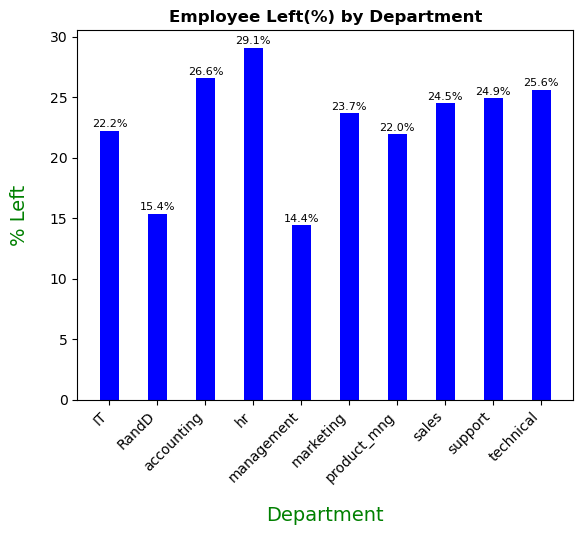

In [695]:
dept_group = df.groupby('Department')['left'].mean() * 100
bars = plt.bar(dept_group.index, dept_group.values, color='b', width=0.4)
plt.title("Employee Left(%) by Department", fontweight='bold')
plt.xlabel("Department", fontsize=14, color='g', labelpad=15)
plt.ylabel('% Left', fontsize=14, color='g', labelpad=15)
plt.xticks(rotation=45, ha='right')

for bar in bars:
  height = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, height+0.3, f"{height:.1f}%", ha='center', fontsize=8)

plt.show()

In [696]:
df = pd.get_dummies(df, columns=['Department','salary'], drop_first= True)
x = df.drop(columns='left', axis=1)
y = df['left']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42,test_size=0.2)

In [697]:
model = LogisticRegression(max_iter=20, solver='liblinear', random_state=42)  
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [698]:

print("Accuracy score: ", accuracy_score(y_test, y_pred))
print(model.n_iter_)

Accuracy score:  0.7813333333333333
[14]
